# **ASSIGNMENT 11** #

## ***2. TEXT MINING - AMAZON REVIEW OF ONEPLUS 11G*** ##

In [ ]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [ ]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/Redmi-Jade-Black-4GB-128GB/dp/B0C9JDHZTB/ref=sr_1_8?crid=1UJEO2JI9NJFL&keywords=redmi&qid=1698326755&sprefix=redmi%2Caps%2C215&sr=8-8&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [ ]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Redmi-Jade-Black-4GB-128GB/dp/B0C9JDHZTB/ref=sr_1_8?crid=1UJEO2JI9NJFL&keywords=redmi&qid=1698326755&sprefix=redmi%2Caps%2C215&sr=8-8&th=1')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-6-a6d19d7ca336>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nEasy 5g device- good hotsp...,I am enjoying 5g access for first time.This de...,9 September 2023
1,3.0,3.0 out of 5 stars\nGood hardware for its pric...,I like quite a lot about this phone. In terms ...,27 August 2023
2,4.0,4.0 out of 5 stars\nBest for those who want be...,"I recently purchased a new phone, and I must s...",12 October 2023
3,4.0,4.0 out of 5 stars\nHonest Review,No doubt phone is good look wise..But kuch plu...,21 October 2023
4,4.0,4.0 out of 5 stars\nFront cam is too bad.,Though I dont use Camera must..I have used amm...,21 October 2023
...,...,...,...,...
3299,4.0,4.0 out of 5 stars\nHonest Review,No doubt phone is good look wise..But kuch plu...,21 October 2023
3300,4.0,4.0 out of 5 stars\nFront cam is too bad.,Though I dont use Camera must..I have used amm...,21 October 2023
3301,4.0,4.0 out of 5 stars\nGood phone,Display brightness is at lower side. Fingerpri...,18 October 2023
3302,4.0,4.0 out of 5 stars\nValue for money.,I like it's appearance very nice. 5g in low bu...,21 October 2023


In [143]:
from google.colab import files
df.to_csv('Amazon_Reviews_Jade_Black 4GB_RAM_128GB_ROM.csv', encoding = 'utf-8-sig')
files.download('Amazon_Reviews_Jade_Black 4GB_RAM_128GB_ROM.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **AMAZON REVIEW - Perform emotion mining** #

**File: Amazon_Reviews_Redmi_12_Jade_Black 4GB_RAM_128GB_ROM.csv**

In [144]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
import re
import time
from wordcloud import WordCloud, STOPWORDS
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

import warnings
warnings.filterwarnings('ignore')
# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

## **IMPORTING DATA FROM THE FILE - Amazon_Reviews_Redmi_12_Jade_Black_4GB_RAM_128GB_ROM.csv** ##

In [145]:
# Reading the data from the file 'Amazon_Reviews_Redmi_12_Jade_Black 4GB_RAM_128GB_ROM.csv'
ar_orig_data = pd.read_csv("Amazon_Reviews_Redmi_12_Jade_Black 4GB_RAM_128GB_ROM.csv")
ar_orig_data.head()

,Unnamed: 0,Rating,Title,Review,Review_Date
0,0,4.0,4.0 out of 5 stars\nEasy 5g device- good hotsp...,I am enjoying 5g access for first time.This de...,9 September 2023
1,1,3.0,3.0 out of 5 stars\nGood hardware for its pric...,I like quite a lot about this phone. In terms ...,27 August 2023
2,2,4.0,4.0 out of 5 stars\nBest for those who want be...,"I recently purchased a new phone, and I must s...",12 October 2023
3,3,4.0,4.0 out of 5 stars\nHonest Review,No doubt phone is good look wise..But kuch plu...,21 October 2023
4,4,4.0,4.0 out of 5 stars\nFront cam is too bad.,Though I dont use Camera must..I have used amm...,21 October 2023


## **EDA (Exploratory Data Analysis)** ##

In [146]:
ar_orig_data.shape

(3304, 5)

#### ***Removing the redundant column 'Unnamed: 0'*** ####

In [147]:
ar_orig_data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [148]:
ar_orig_data.Rating.describe()

count    3304.000000
mean        3.875000
std         0.330769
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: Rating, dtype: float64

#### ***Number of Words*** ####

In [149]:
ar_data = ar_orig_data.copy()

In [150]:
ar_data['WORD_COUNT'] = [len(str(x).split(" ")) for x in ar_data['Review']]
ar_data[['Review','WORD_COUNT']].head()

,Review,WORD_COUNT
0,I am enjoying 5g access for first time.This de...,266
1,I like quite a lot about this phone. In terms ...,211
2,"I recently purchased a new phone, and I must s...",133
3,No doubt phone is good look wise..But kuch plu...,91
4,Though I dont use Camera must..I have used amm...,69


#### ***Number of Characters*** ####

In [151]:
# Here each character is counted including spaces
ar_data['CHARACTER_COUNT'] = ar_data['Review'].str.len()
ar_data[['Review','CHARACTER_COUNT']].head()

,Review,CHARACTER_COUNT
0,I am enjoying 5g access for first time.This de...,1460
1,I like quite a lot about this phone. In terms ...,1200
2,"I recently purchased a new phone, and I must s...",894
3,No doubt phone is good look wise..But kuch plu...,481
4,Though I dont use Camera must..I have used amm...,377


#### ***Average Word Length*** ####

In [152]:
def get_avg_wl(sentence):
  words = []
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

ar_data['AVG_WL'] = [get_avg_wl(x) for x in ar_data['Review']]
ar_data[['Review','AVG_WL']].head()

,Review,AVG_WL
0,I am enjoying 5g access for first time.This de...,4.574713
1,I like quite a lot about this phone. In terms ...,4.665094
2,"I recently purchased a new phone, and I must s...",5.679104
3,No doubt phone is good look wise..But kuch plu...,4.239130
4,Though I dont use Camera must..I have used amm...,4.400000


#### ***Number of stopwords*** ####

In [153]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

ar_data['STOPWORDS'] = [len([x for x in str(x).split() if x in stop]) for x in ar_data['Review']]
ar_data[['Review','STOPWORDS']].head()

,Review,STOPWORDS
0,I am enjoying 5g access for first time.This de...,74
1,I like quite a lot about this phone. In terms ...,88
2,"I recently purchased a new phone, and I must s...",49
3,No doubt phone is good look wise..But kuch plu...,11
4,Though I dont use Camera must..I have used amm...,22


#### ***Number of special characters*** ####

In [154]:
ar_data['HASHTAGS'] = [len([x for x in str(x).split() if x.startswith('#')]) for x in ar_data['Review']]
ar_data[['Review','HASHTAGS']].head()

,Review,HASHTAGS
0,I am enjoying 5g access for first time.This de...,0
1,I like quite a lot about this phone. In terms ...,0
2,"I recently purchased a new phone, and I must s...",0
3,No doubt phone is good look wise..But kuch plu...,0
4,Though I dont use Camera must..I have used amm...,0


#### ***Number of numeric*** ####

In [155]:
ar_data['NUMERIC'] = [len([x for x in str(x).split() if x.isdigit()]) for x in ar_data['Review']]
ar_data[['Review','NUMERIC']].head()

,Review,NUMERIC
0,I am enjoying 5g access for first time.This de...,1
1,I like quite a lot about this phone. In terms ...,4
2,"I recently purchased a new phone, and I must s...",0
3,No doubt phone is good look wise..But kuch plu...,0
4,Though I dont use Camera must..I have used amm...,1


In [156]:
ar_data

,Rating,Title,Review,Review_Date,WORD_COUNT,CHARACTER_COUNT,AVG_WL,STOPWORDS,HASHTAGS,NUMERIC
0,4.0,4.0 out of 5 stars\nEasy 5g device- good hotsp...,I am enjoying 5g access for first time.This de...,9 September 2023,266,1460,4.574713,74,0,1
1,3.0,3.0 out of 5 stars\nGood hardware for its pric...,I like quite a lot about this phone. In terms ...,27 August 2023,211,1200,4.665094,88,0,4
2,4.0,4.0 out of 5 stars\nBest for those who want be...,"I recently purchased a new phone, and I must s...",12 October 2023,133,894,5.679104,49,0,0
3,4.0,4.0 out of 5 stars\nHonest Review,No doubt phone is good look wise..But kuch plu...,21 October 2023,91,481,4.239130,11,0,0
4,4.0,4.0 out of 5 stars\nFront cam is too bad.,Though I dont use Camera must..I have used amm...,21 October 2023,69,377,4.400000,22,0,1
...,...,...,...,...,...,...,...,...,...,...
3299,4.0,4.0 out of 5 stars\nHonest Review,No doubt phone is good look wise..But kuch plu...,21 October 2023,91,481,4.239130,11,0,0
3300,4.0,4.0 out of 5 stars\nFront cam is too bad.,Though I dont use Camera must..I have used amm...,21 October 2023,69,377,4.400000,22,0,1
3301,4.0,4.0 out of 5 stars\nGood phone,Display brightness is at lower side. Fingerpri...,18 October 2023,64,388,4.984615,25,0,0
3302,4.0,4.0 out of 5 stars\nValue for money.,I like it's appearance very nice. 5g in low bu...,21 October 2023,53,282,4.320755,13,0,1


#### ***Number of Uppercase words*** ####

In [157]:
ar_data['UPPER'] = [len([x for x in str(x).split() if x.isupper()]) for x in ar_data['Review']]
ar_data[['Review','UPPER']].head()

,Review,UPPER
0,I am enjoying 5g access for first time.This de...,13
1,I like quite a lot about this phone. In terms ...,11
2,"I recently purchased a new phone, and I must s...",2
3,No doubt phone is good look wise..But kuch plu...,1
4,Though I dont use Camera must..I have used amm...,3


In [158]:
ar_data.drop(['NUMERIC','HASHTAGS','STOPWORDS','AVG_WL','CHARACTER_COUNT','WORD_COUNT','UPPER'],axis=1,inplace=True)

In [159]:
ar_data

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nEasy 5g device- good hotsp...,I am enjoying 5g access for first time.This de...,9 September 2023
1,3.0,3.0 out of 5 stars\nGood hardware for its pric...,I like quite a lot about this phone. In terms ...,27 August 2023
2,4.0,4.0 out of 5 stars\nBest for those who want be...,"I recently purchased a new phone, and I must s...",12 October 2023
3,4.0,4.0 out of 5 stars\nHonest Review,No doubt phone is good look wise..But kuch plu...,21 October 2023
4,4.0,4.0 out of 5 stars\nFront cam is too bad.,Though I dont use Camera must..I have used amm...,21 October 2023
...,...,...,...,...
3299,4.0,4.0 out of 5 stars\nHonest Review,No doubt phone is good look wise..But kuch plu...,21 October 2023
3300,4.0,4.0 out of 5 stars\nFront cam is too bad.,Though I dont use Camera must..I have used amm...,21 October 2023
3301,4.0,4.0 out of 5 stars\nGood phone,Display brightness is at lower side. Fingerpri...,18 October 2023
3302,4.0,4.0 out of 5 stars\nValue for money.,I like it's appearance very nice. 5g in low bu...,21 October 2023


#### ***Spelling Correction*** ####

In [160]:
# The textblob library is used for spelling correction that helps in reducing multiple copies of words
from textblob import TextBlob
[str(TextBlob(x).correct()) for x in ar_data['Review'][:5]]

["I am enjoying g access for first time.His device is entry level by amazon and red collaboration.I bought this for less than k with my old red a  exchange offer.Shone speck  for go ram - I have good OTT apes and screen is good.Usage of 1.B ram by of is too much though.I hope coming updated fix this.Lock screen is finger print -Its good upgrade for me.Experience using other launched and keypads - I use nova launched and microsoft swift keypad- gesture control is blocked when you opt for third party launched - keyboard looks perfect with big screen.There is 3 button at bottom which you can remove.Bloatware is plenty - I didn't sign in goose account immediately - I install most apes.I feel battery drain with my g usage ,But yeah great  hotspot for my lawton or tablet.Naming :Not much into gazing - I play crossroads , spelling games- hardly any issue when playing . His phone is not for graphics intensive games. But Okay for subways suffer , temple run games kind of games .Issues :I am wai

## **FEATURE ENGINEERING** ##

#### ***Spliting Review Date into Three seperate Columns (Year,Month,Day)*** ####

In [161]:
print(ar_data['Review_Date'].str.split(' ').str[0],'\n',
      ar_data['Review_Date'].str.split(' ').str[1],'\n',
      ar_data['Review_Date'].str.split(' ').str[2])

0        9
1       27
2       12
3       21
4       21
        ..
3299    21
3300    21
3301    18
3302    21
3303    13
Name: Review_Date, Length: 3304, dtype: object 
 0       September
1          August
2         October
3         October
4         October
          ...    
3299      October
3300      October
3301      October
3302      October
3303      October
Name: Review_Date, Length: 3304, dtype: object 
 0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
3299    2023
3300    2023
3301    2023
3302    2023
3303    2023
Name: Review_Date, Length: 3304, dtype: object


In [162]:
df=ar_data.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,9,September,2023
1,27,August,2023
2,12,October,2023
3,21,October,2023
4,21,October,2023
...,...,...,...
3299,21,October,2023
3300,21,October,2023
3301,18,October,2023
3302,21,October,2023


In [163]:
df.Month.value_counts()

October      2478
September     413
August        413
Name: Month, dtype: int64

#### ***Change 'month' from words to numbers for easier analysis*** ####

In [164]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,9
1,8
2,10
3,10
4,10
...,...
3299,10
3300,10
3301,10
3302,10


In [165]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3304 entries, 0 to 3303
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       3304 non-null   float64
 1   Title        3304 non-null   object 
 2   Review       3304 non-null   object 
 3   Review_Date  3304 non-null   object 
 4   Date         3304 non-null   object 
 5   Month        3304 non-null   int64  
 6   Year         3304 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 180.8+ KB


In [166]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3304 entries, 0 to 3303
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       3304 non-null   float64
 1   Title        3304 non-null   object 
 2   Review       3304 non-null   object 
 3   Review_Date  3304 non-null   object 
 4   Date         3304 non-null   int64  
 5   Month        3304 non-null   int64  
 6   Year         3304 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 180.8+ KB


#### ***Dropping the Original Columns after splitting the data*** ####

In [167]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,4.0,4.0 out of 5 stars\nEasy 5g device- good hotsp...,I am enjoying 5g access for first time.This de...,9,9,2023
1,3.0,3.0 out of 5 stars\nGood hardware for its pric...,I like quite a lot about this phone. In terms ...,27,8,2023
2,4.0,4.0 out of 5 stars\nBest for those who want be...,"I recently purchased a new phone, and I must s...",12,10,2023
3,4.0,4.0 out of 5 stars\nHonest Review,No doubt phone is good look wise..But kuch plu...,21,10,2023
4,4.0,4.0 out of 5 stars\nFront cam is too bad.,Though I dont use Camera must..I have used amm...,21,10,2023


In [168]:
df

,Rating,Title,Review,Review_Date,Date,Month,Year
0,4.0,4.0 out of 5 stars\nEasy 5g device- good hotsp...,I am enjoying 5g access for first time.This de...,9 September 2023,9,September,2023
1,3.0,3.0 out of 5 stars\nGood hardware for its pric...,I like quite a lot about this phone. In terms ...,27 August 2023,27,August,2023
2,4.0,4.0 out of 5 stars\nBest for those who want be...,"I recently purchased a new phone, and I must s...",12 October 2023,12,October,2023
3,4.0,4.0 out of 5 stars\nHonest Review,No doubt phone is good look wise..But kuch plu...,21 October 2023,21,October,2023
4,4.0,4.0 out of 5 stars\nFront cam is too bad.,Though I dont use Camera must..I have used amm...,21 October 2023,21,October,2023
...,...,...,...,...,...,...,...
3299,4.0,4.0 out of 5 stars\nHonest Review,No doubt phone is good look wise..But kuch plu...,21 October 2023,21,October,2023
3300,4.0,4.0 out of 5 stars\nFront cam is too bad.,Though I dont use Camera must..I have used amm...,21 October 2023,21,October,2023
3301,4.0,4.0 out of 5 stars\nGood phone,Display brightness is at lower side. Fingerpri...,18 October 2023,18,October,2023
3302,4.0,4.0 out of 5 stars\nValue for money.,I like it's appearance very nice. 5g in low bu...,21 October 2023,21,October,2023


## **DATA VISUALIZATIONS** ##

#### ***Date versus review count*** ####

In [169]:
df['Date'].value_counts()

21    1239
9      413
27     413
12     413
18     413
13     413
Name: Date, dtype: int64

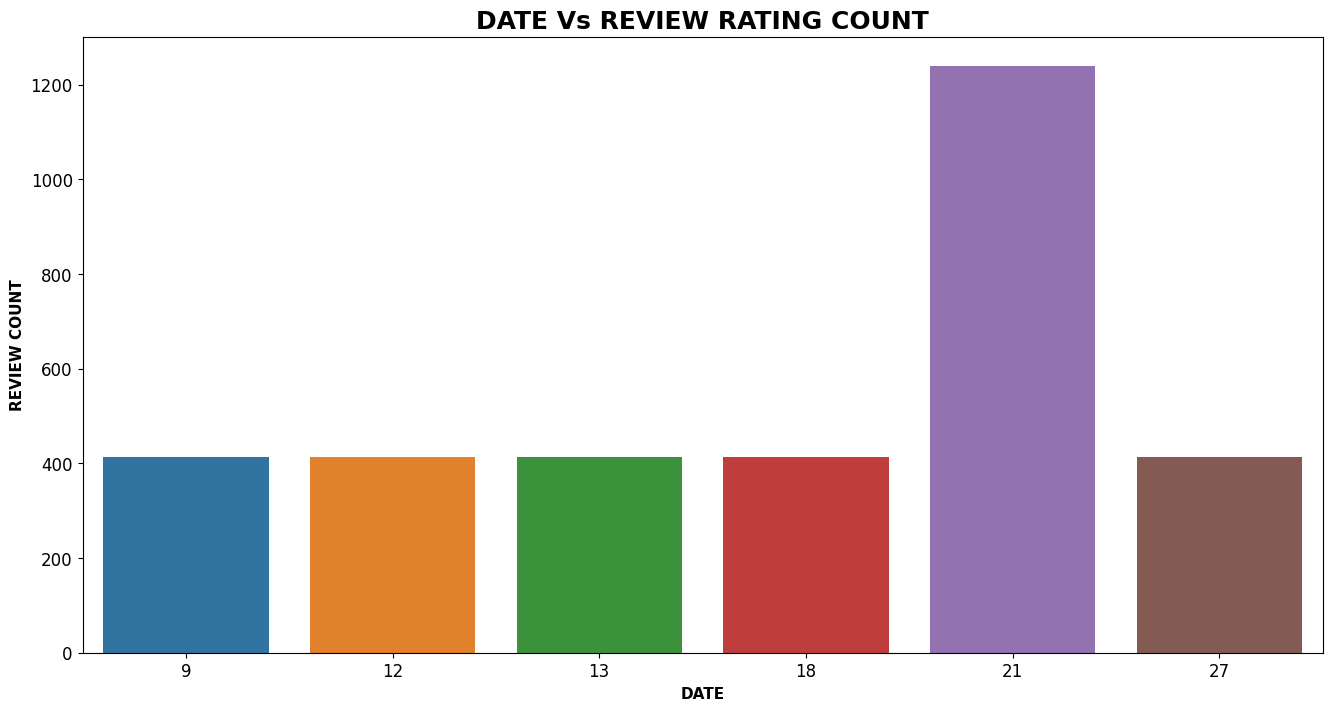

In [170]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('DATE Vs REVIEW RATING COUNT', weight='bold', size=18)
plt.xlabel("DATE", size=11, weight='bold')
plt.ylabel("REVIEW COUNT", size=11, weight='bold')
plt.yticks(rotation = 0,fontsize = 12)
plt.xticks(rotation = 0,fontsize = 12)
plt.show()

In [171]:
df['Rating'].value_counts()

4.0    2891
3.0     413
Name: Rating, dtype: int64

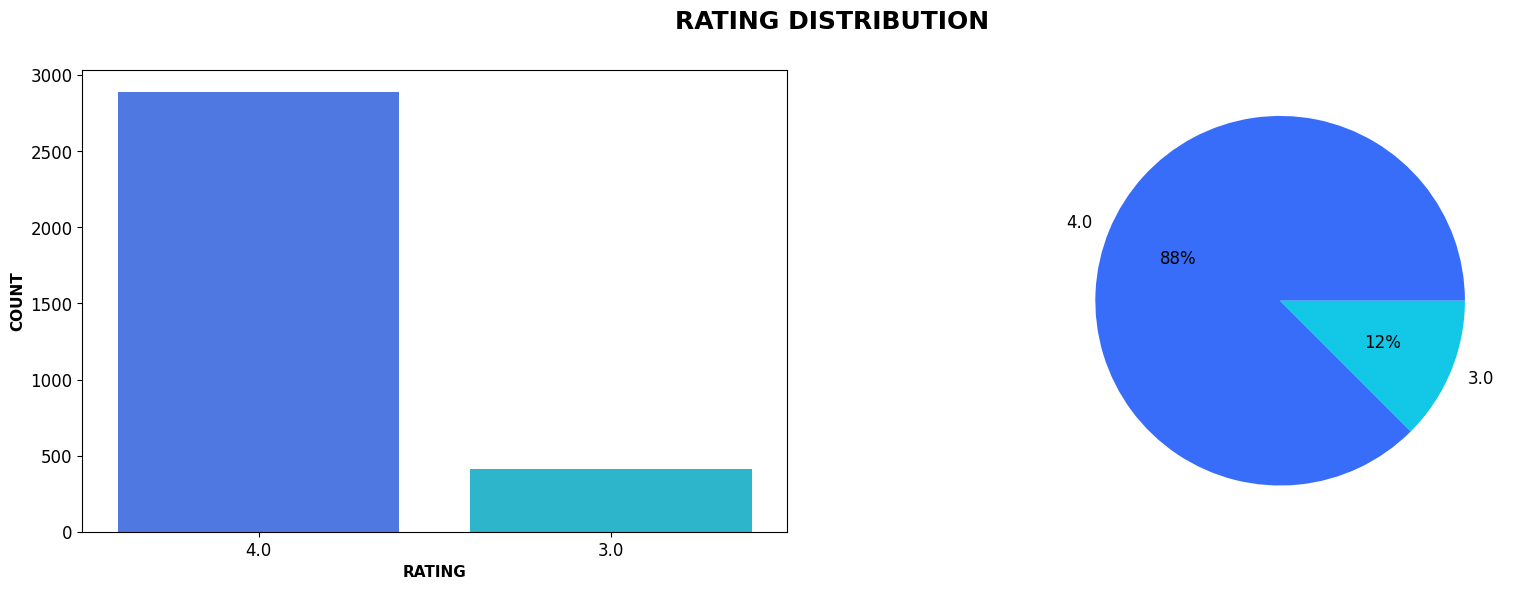

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature,color):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    palette_color = sns.color_palette(color)
    sns.countplot(x=feature, data=data, palette = palette_color, order=data[feature].value_counts().index)
    plt.xticks(rotation = 0,fontsize = 12)
    plt.yticks(rotation = 0,fontsize = 12)
    plt.xlabel("RATING", size=11, weight='bold')
    plt.ylabel("COUNT", size=11, weight='bold')


    # Display state data in a form of Pie Graph
    plt.subplot(1,2,2)
    values = data[feature].value_counts().keys().tolist()
    counts = data[feature].value_counts().tolist()
    plt.pie(data[feature].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%', textprops = {'size':'12', 'color':'black'})

    plt.suptitle("RATING DISTRIBUTION", weight='bold', size=18)

plot_data(df,'Rating','rainbow')

In [173]:
df['Month'].value_counts()

October      2478
September     413
August        413
Name: Month, dtype: int64

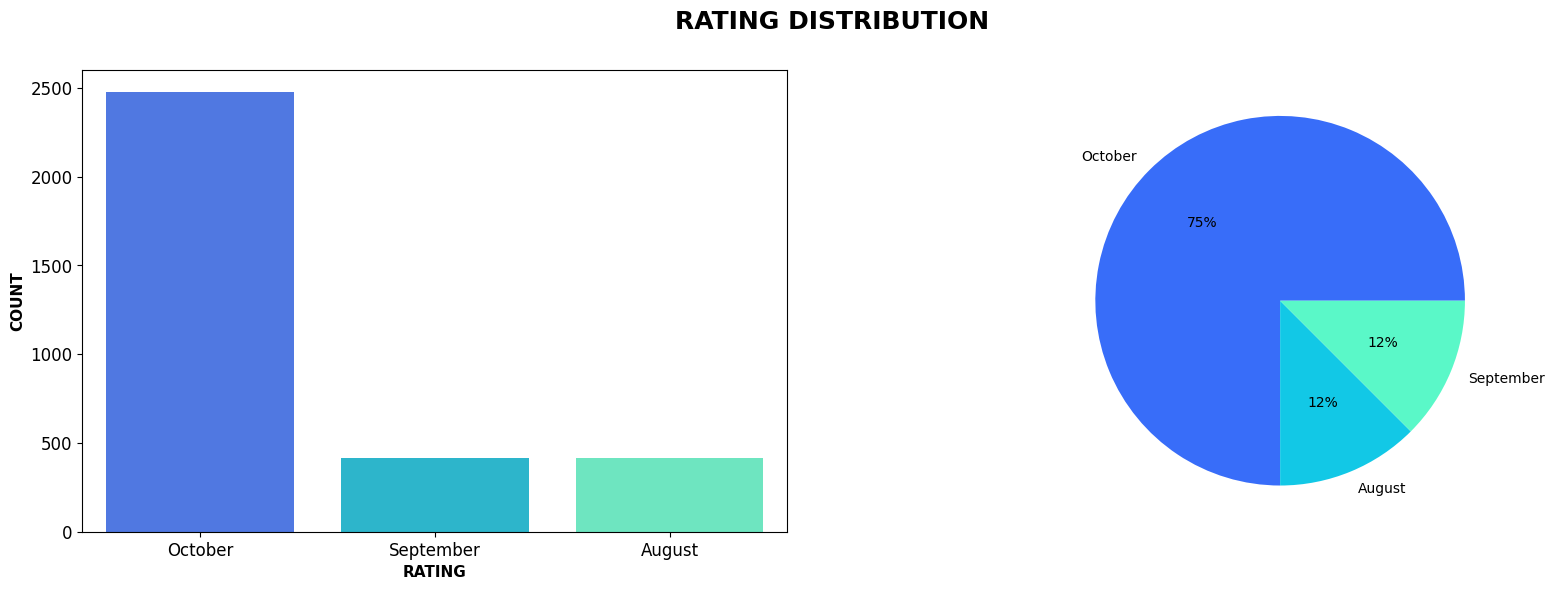

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab


def plot_data(data,feature,color):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    palette_color = sns.color_palette(color)
    sns.countplot(x=feature, data=data, palette = palette_color, order=data[feature].value_counts().index)
    plt.xticks(rotation = 0,fontsize = 12)
    plt.yticks(rotation = 0,fontsize = 12)
    plt.xlabel("RATING", size=11, weight='bold')
    plt.ylabel("COUNT", size=11, weight='bold')


    # Display state data in a form of Pie Graph
    plt.subplot(1,2,2)
    values = data.value_counts(feature)[data.value_counts(feature)>10].tolist()
    labels = data.value_counts(feature)[data.value_counts(feature)>10].index.tolist()
    plt.pie(values, labels=labels, colors=palette_color, autopct='%.0f%%')

    plt.suptitle("RATING DISTRIBUTION", weight='bold', size=18)

plot_data(df,'Month','rainbow')

### **BASIC TEXT PROCESSING** ###

#### ***A. For Sentiment Analysis*** ####

##### ***Keeping the DataFrame intact and each tweets separate from each other*** #####

In [175]:
data = df[['Review']]
data

,Review
0,I am enjoying 5g access for first time.This de...
1,I like quite a lot about this phone. In terms ...
2,"I recently purchased a new phone, and I must s..."
3,No doubt phone is good look wise..But kuch plu...
4,Though I dont use Camera must..I have used amm...
...,...
3299,No doubt phone is good look wise..But kuch plu...
3300,Though I dont use Camera must..I have used amm...
3301,Display brightness is at lower side. Fingerpri...
3302,I like it's appearance very nice. 5g in low bu...


In [176]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))
data

,Review
0,i enjoying 5g access first time.this device en...
1,"i like quite lot phone. in terms hardware, exc..."
2,"i recently purchased new phone, i must say i'm..."
3,no doubt phone good look wise..but kuch plus p...
4,though i dont use camera must..i used amm redm...
...,...
3299,no doubt phone good look wise..but kuch plus p...
3300,though i dont use camera must..i used amm redm...
3301,display brightness lower side. fingerprint sen...
3302,i like appearance nice. 5g low budget. i used ...


In [177]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/3304 [00:00<?, ?it/s]

In [178]:
# Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
1,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...
2,recently purchased new phone must say quite im...,"I recently purchased a new phone, and I must s..."
3,doubt phone good look wise kuch plus point bhi...,No doubt phone is good look wise..But kuch plu...
4,though dont use camera must used amm redmi pho...,Though I dont use Camera must..I have used amm...


### **TEXT PRE-PROCESSING TECHNIQUES** ###

#### ***A. Pre-processing 'Key Words'*** ####

##### ***a. Removing '@names'*** #####

In [179]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [180]:
# We are keeping cleaned review in a new column called 'Clean_Reviews'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
1,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...
2,recently purchased new phone must say quite im...,"I recently purchased a new phone, and I must s..."
3,doubt phone good look wise kuch plus point bhi...,No doubt phone is good look wise..But kuch plu...
4,though dont use camera must used amm redmi pho...,Though I dont use Camera must..I have used amm...
5,display brightness lower side fingerprint sens...,Display brightness is at lower side. Fingerpri...
6,like appearance nice g low budget used redmi m...,I like it's appearance very nice. 5g in low bu...
7,phone budget master phone give needed feature ...,This phone is an budget master phone. It gives...
8,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
9,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...


##### ***b. Removing links (http | https)*** #####

In [181]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
1,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...
2,recently purchased new phone must say quite im...,"I recently purchased a new phone, and I must s..."
3,doubt phone good look wise kuch plus point bhi...,No doubt phone is good look wise..But kuch plu...
4,though dont use camera must used amm redmi pho...,Though I dont use Camera must..I have used amm...
5,display brightness lower side fingerprint sens...,Display brightness is at lower side. Fingerpri...
6,like appearance nice g low budget used redmi m...,I like it's appearance very nice. 5g in low bu...
7,phone budget master phone give needed feature ...,This phone is an budget master phone. It gives...
8,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
9,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...


##### ***c. Removing Review with empty text*** #####

In [182]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
1,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...
2,recently purchased new phone must say quite im...,"I recently purchased a new phone, and I must s..."
3,doubt phone good look wise kuch plus point bhi...,No doubt phone is good look wise..But kuch plu...
4,though dont use camera must used amm redmi pho...,Though I dont use Camera must..I have used amm...
5,display brightness lower side fingerprint sens...,Display brightness is at lower side. Fingerpri...
6,like appearance nice g low budget used redmi m...,I like it's appearance very nice. 5g in low bu...
7,phone budget master phone give needed feature ...,This phone is an budget master phone. It gives...
8,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
9,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...


In [183]:
dataframe.shape

(3304, 2)

##### ***d. Dropping duplicate rows*** #####

In [184]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
1,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...
2,recently purchased new phone must say quite im...,"I recently purchased a new phone, and I must s..."
3,doubt phone good look wise kuch plus point bhi...,No doubt phone is good look wise..But kuch plu...
4,though dont use camera must used amm redmi pho...,Though I dont use Camera must..I have used amm...
5,display brightness lower side fingerprint sens...,Display brightness is at lower side. Fingerpri...
6,like appearance nice g low budget used redmi m...,I like it's appearance very nice. 5g in low bu...
7,phone budget master phone give needed feature ...,This phone is an budget master phone. It gives...
8,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
9,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...


In [185]:
dataframe.shape

(3304, 2)

##### ***e. Resetting index*** #####

In [186]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
1,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...
2,recently purchased new phone must say quite im...,"I recently purchased a new phone, and I must s..."
3,doubt phone good look wise kuch plus point bhi...,No doubt phone is good look wise..But kuch plu...
4,though dont use camera must used amm redmi pho...,Though I dont use Camera must..I have used amm...
5,display brightness lower side fingerprint sens...,Display brightness is at lower side. Fingerpri...
6,like appearance nice g low budget used redmi m...,I like it's appearance very nice. 5g in low bu...
7,phone budget master phone give needed feature ...,This phone is an budget master phone. It gives...
8,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
9,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...


##### ***f. Removing Punctuations, Numbers and Special characters*** #####

In [187]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [188]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
1,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...
2,recently purchased new phone must say quite im...,"I recently purchased a new phone, and I must s..."
3,doubt phone good look wise kuch plus point bhi...,No doubt phone is good look wise..But kuch plu...
4,though dont use camera must used amm redmi pho...,Though I dont use Camera must..I have used amm...
5,display brightness lower side fingerprint sens...,Display brightness is at lower side. Fingerpri...
6,like appearance nice g low budget used redmi m...,I like it's appearance very nice. 5g in low bu...
7,phone budget master phone give needed feature ...,This phone is an budget master phone. It gives...
8,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
9,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...


##### ***g. Function to remove emoji*** #####

In [189]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [190]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
1,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...
2,recently purchased new phone must say quite im...,"I recently purchased a new phone, and I must s..."
3,doubt phone good look wise kuch plus point bhi...,No doubt phone is good look wise..But kuch plu...
4,though dont use camera must used amm redmi pho...,Though I dont use Camera must..I have used amm...
5,display brightness lower side fingerprint sens...,Display brightness is at lower side. Fingerpri...
6,like appearance nice g low budget used redmi m...,I like it's appearance very nice. 5g in low bu...
7,phone budget master phone give needed feature ...,This phone is an budget master phone. It gives...
8,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
9,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...


In [191]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...,"[enjoying, g, access, first, time, device, ent..."
1,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...,"[like, quite, lot, phone, term, hardware, exce..."
2,recently purchased new phone must say quite im...,"I recently purchased a new phone, and I must s...","[recently, purchased, new, phone, must, say, q..."
3,doubt phone good look wise kuch plus point bhi...,No doubt phone is good look wise..But kuch plu...,"[doubt, phone, good, look, wise, kuch, plus, p..."
4,though dont use camera must used amm redmi pho...,Though I dont use Camera must..I have used amm...,"[though, dont, use, camera, must, used, amm, r..."
5,display brightness lower side fingerprint sens...,Display brightness is at lower side. Fingerpri...,"[display, brightness, lower, side, fingerprint..."
6,like appearance nice g low budget used redmi m...,I like it's appearance very nice. 5g in low bu...,"[like, appearance, nice, g, low, budget, used,..."
7,phone budget master phone give needed feature ...,This phone is an budget master phone. It gives...,"[phone, budget, master, phone, give, needed, f..."
8,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...,"[enjoying, g, access, first, time, device, ent..."
9,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...,"[like, quite, lot, phone, term, hardware, exce..."


In [192]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

##### ***h. Removing Stop words*** #####

In [193]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [194]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [195]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
1,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...
2,recently purchased new phone must say quite im...,"I recently purchased a new phone, and I must s..."
3,doubt phone good look wise kuch plus point bhi...,No doubt phone is good look wise..But kuch plu...
4,though dont use camera must used amm redmi pho...,Though I dont use Camera must..I have used amm...
5,display brightness lower side fingerprint sens...,Display brightness is at lower side. Fingerpri...
6,like appearance nice g low budget used redmi m...,I like it's appearance very nice. 5g in low bu...
7,phone budget master phone give needed feature ...,This phone is an budget master phone. It gives...
8,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...
9,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...


##### ***i. Tokenize 'Clean_Reviews'*** #####

In [196]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['like', 'quite', 'lot', 'phone', 'term', 'hardware', 'excellent', 'phone', 'price', 'g', 'gb', 'memory', 'gb', 'storage', 'pretty', 'decent', 'processor', 'boot', 'hardware', 'spec', 'neat', 'far', 'good', 'time', 'camera', 'picture', 'often', 'come', 'blurry', 'mean', 'autofocus', 'quick', 'redmi', 'older', 'note', 'phone', 'better', 'camera', 'biggest', 'disappointment', 'phone', 'ui', 'miui', 'terrible', 'customization', 'thing', 'firstly', 'expect', 'lot', 'feature', 'offered', 'xiaomi', 'lock', 'many', 'miui', 'feature', 'china', 'also', 'lock', 'lower', 'end', 'device', 'like', 'secondly', 'disabled', 'full', 'screen', 'gesture', 'using', 'custom', 'launcher', 'default', 'miui', 'launcher', 'terrible', 'well', 'look', 'good', 'individual', 'accustomed', 'stock', 'android', 'experience', 'miui', 'dismal', 'experience', 'almost', 'day', 'using', 'phone', 'really', 'want', 'give', 'phone', 'higher', 'rating', 'software', 'preventing', 'overall', 'think', 'solid', 'hardware

In [197]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [enjoying, g, access, first, time, device, ent...
1    [like, quite, lot, phone, term, hardware, exce...
2    [recently, purchased, new, phone, must, say, q...
3    [doubt, phone, good, look, wise, kuch, plus, p...
4    [though, dont, use, camera, must, used, amm, r...
5    [display, brightness, lower, side, fingerprint...
6    [like, appearance, nice, g, low, budget, used,...
7    [phone, budget, master, phone, give, needed, f...
8    [enjoying, g, access, first, time, device, ent...
9    [like, quite, lot, phone, term, hardware, exce...
Name: Clean_Reviews, dtype: object

##### ***j. Converting words to Stemmer*** #####

In [198]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [199]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,enjoy g access first time devic entri level am...
1,like quit lot phone term hardwar excel phone p...
2,recent purchas new phone must say quit impress...
3,doubt phone good look wise kuch plus point bhi...
4,though dont use camera must use amm redmi phon...
...,...
3299,doubt phone good look wise kuch plus point bhi...
3300,though dont use camera must use amm redmi phon...
3301,display bright lower side fingerprint sensor w...
3302,like appear nice g low budget use redmi mobil ...


##### ***k. Converting words to Lemma*** #####

In [200]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,enjoying g access first time device entry leve...
1,like quite lot phone term hardware excellent p...
2,recently purchased new phone must say quite im...
3,doubt phone good look wise kuch plus point bhi...
4,though dont use camera must used amm redmi pho...
...,...
3299,doubt phone good look wise kuch plus point bhi...
3300,though dont use camera must used amm redmi pho...
3301,display brightness lower side fingerprint sens...
3302,like appearance nice g low budget used redmi m...


### **BASIC FEATURE EXTRACTION** ###

#### ***A. Applying bag of Words without N grams*** ####

In [201]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(dataframe.Clean_Reviews)

In [202]:
print(cv.get_feature_names_out()[109:200])

['gb' 'gesture' 'get' 'give' 'giving' 'glass' 'going' 'good' 'google'
 'got' 'granny' 'graphic' 'great' 'hai' 'hand' 'handle' 'hang' 'hardly'
 'hardware' 'heated' 'heavier' 'hi' 'hiccup' 'higher' 'ho' 'hope' 'hoti'
 'hotspot' 'hr' 'immediately' 'immersive' 'impressed' 'inconvenience'
 'individual' 'intensive' 'issue' 'juiced' 'jyda' 'kafi' 'kam' 'kar'
 'keeping' 'keyboard' 'keypad' 'kind' 'know' 'kuch' 'lack' 'landscape'
 'laptop' 'large' 'latest' 'launcher' 'le' 'level' 'lg' 'light' 'like'
 'little' 'load' 'lock' 'look' 'looking' 'lot' 'low' 'lower' 'made'
 'making' 'many' 'master' 'mean' 'mei' 'memory' 'met' 'mic' 'microsoft'
 'minor' 'missing' 'miui' 'mobile' 'mode' 'much' 'multitasking' 'must'
 'nahi' 'natural' 'nearly' 'neat' 'need' 'needed' 'new']


In [203]:
print(cv.get_feature_names_out()[:100])

['aa' 'access' 'account' 'accustomed' 'achi' 'adapted' 'agr' 'almost'
 'alot' 'also' 'amazon' 'amm' 'amoled' 'android' 'appearance' 'apps' 'aur'
 'autofocus' 'average' 'back' 'backup' 'bad' 'basic' 'battery' 'better'
 'bez' 'bhi' 'big' 'biggest' 'bit' 'bloatware' 'blocked' 'blurry' 'boot'
 'bottom' 'bought' 'breeze' 'brightness' 'budget' 'bug' 'button' 'buy'
 'cache' 'call' 'camera' 'cant' 'capture' 'capturing' 'charging' 'china'
 'clear' 'collabration' 'combination' 'come' 'companion' 'compare'
 'compared' 'connected' 'control' 'crashing' 'crisp' 'crossword' 'custom'
 'customization' 'day' 'decent' 'default' 'delayed' 'delivering' 'device'
 'disabled' 'disappoint' 'disappointed' 'disappointment' 'dismal'
 'display' 'dont' 'doubt' 'drain' 'durable' 'easy' 'efficiently'
 'encountered' 'end' 'enhance' 'enjoying' 'ensures' 'entry' 'excellent'
 'exchange' 'exp' 'expect' 'expected' 'experience' 'fantastic' 'far'
 'feature' 'feel' 'felt' 'final']


In [204]:
print(reviewscv.toarray()[100:200])

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### ***B. CountVectorizer with N-grams (Bigrams & Trigrams)*** ####

In [205]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/3304 [00:00<?, ?it/s]

In [206]:
corpus[3]

'doubt phone good look wise kuch plu point bhi hai aur kuch pint bhi easi use like redmi phone littl bit hang bhi ho rha hai fingerprint sensor thoda sa lack kar rha hai camera qualiti expect day light mei achi photo captur kar raha hai agr thodi si bhi light kam hoti hai granni textur aa rha hai kafi kuch jyda hi enhanc kar rha hai photograph bez photograph natur nahi lg rhi batteri backup kam hai read'

In [207]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

In [208]:
x.shape

(3304, 1422)

In [209]:
cv.get_feature_names_out()[:20]

array(['aa', 'aa rha', 'aa rha hai', 'access', 'access first',
       'access first time', 'account', 'account immedi',
       'account immedi uninstal', 'accustom', 'accustom stock',
       'accustom stock android', 'achi', 'achi photo',
       'achi photo captur', 'adapt', 'adapt mic', 'adapt mic issu', 'agr',
       'agr thodi'], dtype=object)

In [210]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [211]:
count_df = pd.DataFrame(x, columns=cv.get_feature_names_out())
count_df

,aa,aa rha,aa rha hai,access,access first,access first time,account,account immedi,account immedi uninstal,accustom,...,work work slow,xiaomi,xiaomi lock,xiaomi lock mani,yeah,yeah great,yeah great hotspot,yup,yup back,yup back camera
0,0,0,0,1,1,1,1,1,1,0,...,0,0,0,0,1,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3302,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### ***C. TF-IDF Vectorizer*** ###

In [212]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/3304 [00:00<?, ?it/s]

In [213]:
corpus[4]

'though dont use camera must use amm redmi phone primethi phone made disappoint alot cant take singl selfi resolut bad yup back camera okay littl heavier redmi note pro seri screen amol use phone sunlight give bad exp remain thing okay redmi phone read'

In [214]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
x=tfidf_v.fit_transform(corpus).toarray()

In [215]:
x.shape

(3304, 1422)

In [216]:
tfidf_v.get_feature_names_out()[:20]

array(['aa', 'aa rha', 'aa rha hai', 'access', 'access first',
       'access first time', 'account', 'account immedi',
       'account immedi uninstal', 'accustom', 'accustom stock',
       'accustom stock android', 'achi', 'achi photo',
       'achi photo captur', 'adapt', 'adapt mic', 'adapt mic issu', 'agr',
       'agr thodi'], dtype=object)

In [217]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [218]:
count_df = pd.DataFrame(x, columns=tfidf_v.get_feature_names_out())
count_df

,aa,aa rha,aa rha hai,access,access first,access first time,account,account immedi,account immedi uninstal,accustom,...,work work slow,xiaomi,xiaomi lock,xiaomi lock mani,yeah,yeah great,yeah great hotspot,yup,yup back,yup back camera
0,0.000000,0.000000,0.000000,0.043822,0.043822,0.043822,0.043822,0.043822,0.043822,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.043822,0.043822,0.043822,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054865,...,0.000000,0.054865,0.054865,0.054865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.054834,0.054834,0.054834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091289,0.091289,0.091289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,0.054834,0.054834,0.054834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091289,0.091289,0.091289
3301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.118892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### ***D. Named Entity Recognition (NER)*** ###

In [219]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'enjoying g access first time device entry level amazon redmi collabration bought le k old redmi exchange offer phone spec gb ram good ott apps screen good usage gb ram much though hope upcoming update fix lock screen finger print good upgrade experience using launcher keypad use nova launcher microsoft swift keypad gesture control blocked opt third party launcher keyboard look perfect big screen button bottom cant remove bloatware plenty sign google account immediately uninstall apps feel battery drain g usage yeah great hotspot laptop tablet gaming much gaming play crossword spelling game hardly issue playing phone graphic intensive game okay subway surfer temple run game kind game issue waiting ui update fix landscape screen crashing also google play load sometimes need reset clear cache charging take hr nearly end charging twice day speaker felt weird day got adapted mic issue taking call speaker mode final verdict looking basic phone g processor ui need bug fix though buy know sig

In [220]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [221]:
for token in doc_block[:50]:
    print(token,token.pos_)

enjoying VERB
g ADJ
access NOUN
first ADJ
time NOUN
device NOUN
entry NOUN
level NOUN
amazon PROPN
redmi PROPN
collabration PROPN
bought VERB
le PROPN
k PROPN
old PROPN
redmi PROPN
exchange PROPN
offer VERB
phone NOUN
spec NOUN
gb PROPN
ram PROPN
good ADJ
ott PROPN
apps NOUN
screen VERB
good ADJ
usage NOUN
gb NOUN
ram NOUN
much ADV
though SCONJ
hope VERB
upcoming ADJ
update NOUN
fix NOUN
lock NOUN
screen NOUN
finger NOUN
print NOUN
good ADJ
upgrade NOUN
experience NOUN
using VERB
launcher PROPN
keypad PROPN
use PROPN
nova PROPN
launcher PROPN
microsoft PROPN


In [222]:
# Filtering the nouns and verbs only
one_block=reviews_text
nlp.max_length = len(one_block) + 100
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['phone', 'price', 'memory', 'gb', 'storage', 'processor', 'boot', 'hardware', 'spec', 'time', 'camera', 'picture', 'come', 'mean', 'autofocus', 'note', 'phone', 'camera', 'disappointment', 'phone', 'customization', 'thing', 'expect', 'lot', 'feature', 'offered', 'lock', 'feature', 'lock', 'end', 'device', 'screen', 'gesture', 'using', 'custom', 'launcher', 'default', 'launcher', 'look', 'stock', 'experience', 'miui', 'experience', 'day', 'using', 'phone', 'want', 'give', 'phone', 'rating', 'software', 'preventing', 'think', 'hardware', 'price', 'going', 'custom', 'rom', 'read', 'purchased', 'phone', 'say', 'feature', 'camera', 'fantastic', 'delivering', 'photo', 'making', 'companion', 'capturing', 'memory', 'screen', 'provides', 'viewing', 'experience', 'watt', 'supercharging', 'ensures', 'phone', 'time', 'keeping', 'connected', 'day', 'performance', 'phone', 'disappoint', 'handle', 'task', 'making', 'multitasking', 'issue', 'encountered', 'delayed', 'response', 'fingerprint', 'sensor

In [223]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

x=cv.fit_transform(nouns_verbs)
sum_words=x.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,9912
1,screen,3304
2,read,2891
3,time,2478
4,day,2478
5,camera,2478
6,experience,2065
7,charging,2065
8,feature,2065
9,use,2065


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

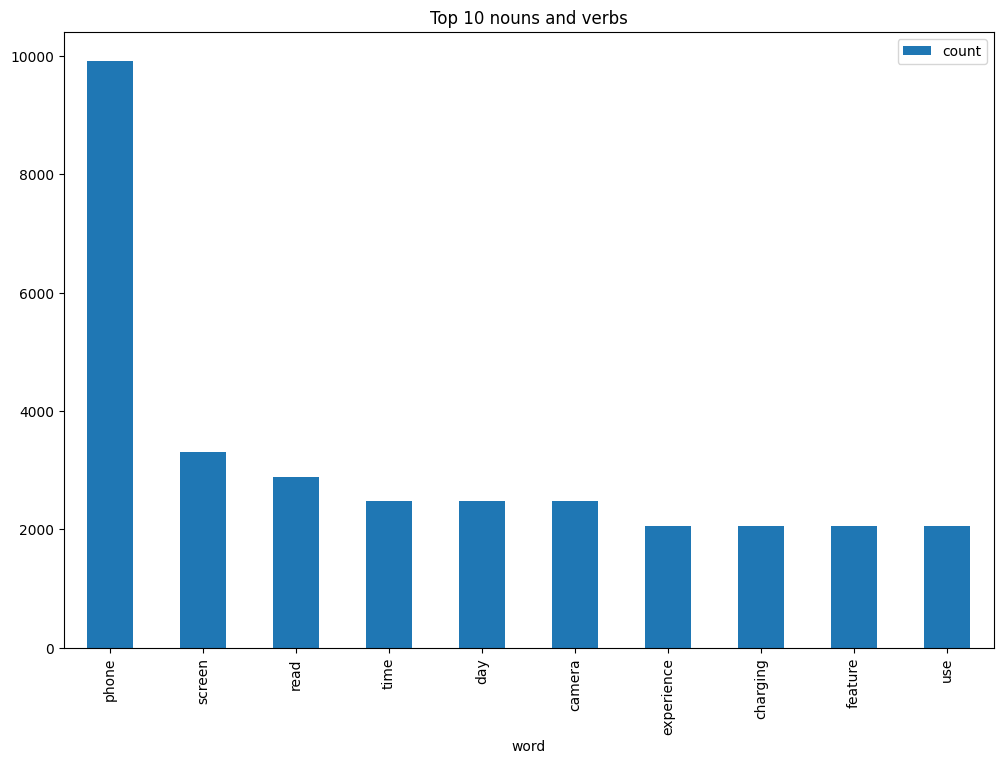

In [224]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

### **FETCH SENTIMENTS** ###

### ***a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)*** ###
### ***b. Using TextBlob*** ###

In [225]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

### ***a. Using NLTK's SentimentIntensityAnalyzer*** ###

In [226]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,2478
neg,826


In [227]:
dataframe.Clean_Reviews[8]

'enjoying g access first time device entry level amazon redmi collabration bought le k old redmi exchange offer phone spec gb ram good ott apps screen good usage gb ram much though hope upcoming update fix lock screen finger print good upgrade experience using launcher keypad use nova launcher microsoft swift keypad gesture control blocked opt third party launcher keyboard look perfect big screen button bottom cant remove bloatware plenty sign google account immediately uninstall apps feel battery drain g usage yeah great hotspot laptop tablet gaming much gaming play crossword spelling game hardly issue playing phone graphic intensive game okay subway surfer temple run game kind game issue waiting ui update fix landscape screen crashing also google play load sometimes need reset clear cache charging take hr nearly end charging twice day speaker felt weird day got adapted mic issue taking call speaker mode final verdict looking basic phone g processor ui need bug fix though buy know sig

In [228]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.02, 'neu': 0.729, 'pos': 0.25, 'compound': 0.99}

In [229]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,enjoying g access first time device entry leve...,"{'neg': 0.02, 'neu': 0.729, 'pos': 0.25, 'comp..."
1,like quite lot phone term hardware excellent p...,"{'neg': 0.131, 'neu': 0.64, 'pos': 0.229, 'com..."
2,recently purchased new phone must say quite im...,"{'neg': 0.069, 'neu': 0.665, 'pos': 0.266, 'co..."
3,doubt phone good look wise kuch plus point bhi...,"{'neg': 0.053, 'neu': 0.794, 'pos': 0.153, 'co..."
4,though dont use camera must used amm redmi pho...,"{'neg': 0.191, 'neu': 0.737, 'pos': 0.072, 'co..."


In [230]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,enjoying g access first time device entry leve...,"{'neg': 0.02, 'neu': 0.729, 'pos': 0.25, 'comp...",0.9900
1,like quite lot phone term hardware excellent p...,"{'neg': 0.131, 'neu': 0.64, 'pos': 0.229, 'com...",0.9117
2,recently purchased new phone must say quite im...,"{'neg': 0.069, 'neu': 0.665, 'pos': 0.266, 'co...",0.9665
3,doubt phone good look wise kuch plus point bhi...,"{'neg': 0.053, 'neu': 0.794, 'pos': 0.153, 'co...",0.8442
4,though dont use camera must used amm redmi pho...,"{'neg': 0.191, 'neu': 0.737, 'pos': 0.072, 'co...",-0.8074


In [231]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,enjoying g access first time device entry leve...,"{'neg': 0.02, 'neu': 0.729, 'pos': 0.25, 'comp...",0.9900,Positive
1,like quite lot phone term hardware excellent p...,"{'neg': 0.131, 'neu': 0.64, 'pos': 0.229, 'com...",0.9117,Positive
2,recently purchased new phone must say quite im...,"{'neg': 0.069, 'neu': 0.665, 'pos': 0.266, 'co...",0.9665,Positive
3,doubt phone good look wise kuch plus point bhi...,"{'neg': 0.053, 'neu': 0.794, 'pos': 0.153, 'co...",0.8442,Positive
4,though dont use camera must used amm redmi pho...,"{'neg': 0.191, 'neu': 0.737, 'pos': 0.072, 'co...",-0.8074,Negative
...,...,...,...,...
3299,doubt phone good look wise kuch plus point bhi...,"{'neg': 0.053, 'neu': 0.794, 'pos': 0.153, 'co...",0.8442,Positive
3300,though dont use camera must used amm redmi pho...,"{'neg': 0.191, 'neu': 0.737, 'pos': 0.072, 'co...",-0.8074,Negative
3301,display brightness lower side fingerprint sens...,"{'neg': 0.087, 'neu': 0.605, 'pos': 0.308, 'co...",0.8750,Positive
3302,like appearance nice g low budget used redmi m...,"{'neg': 0.198, 'neu': 0.64, 'pos': 0.162, 'com...",-0.0516,Negative


In [232]:
df['sentiment'].value_counts()

Positive    2478
Negative     826
Name: sentiment, dtype: int64

In [233]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), '#4c9a47')


## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), '#bebe00')

# Creating two subplots
fig = tools.make_subplots(rows=2, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
# fig.append_trace(trace1, 2, 1)
fig.append_trace(trace1, 2, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

In [234]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,sentiment,Review
1,Positive,2478
0,Negative,826


<Axes: xlabel='sentiment', ylabel='count'>

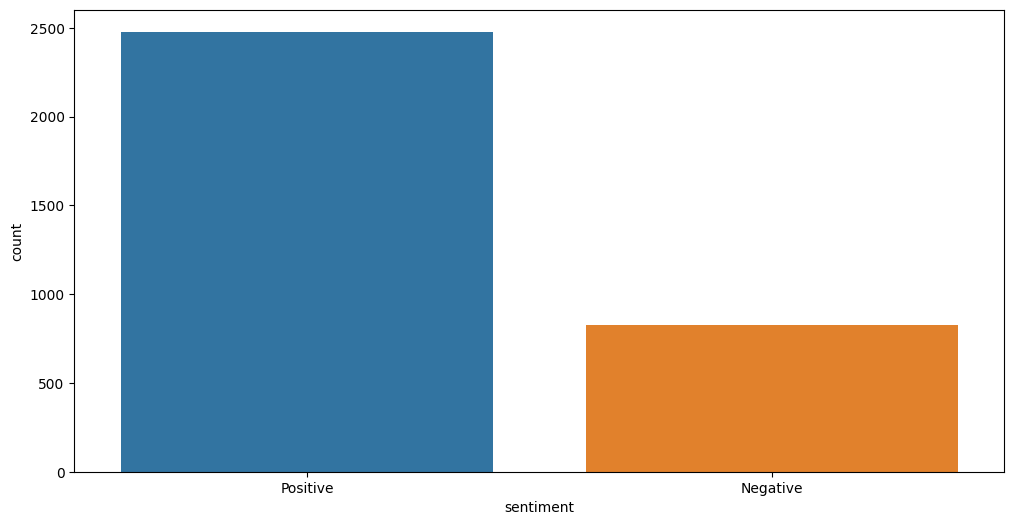

In [235]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<Axes: xlabel='compound', ylabel='Density'>

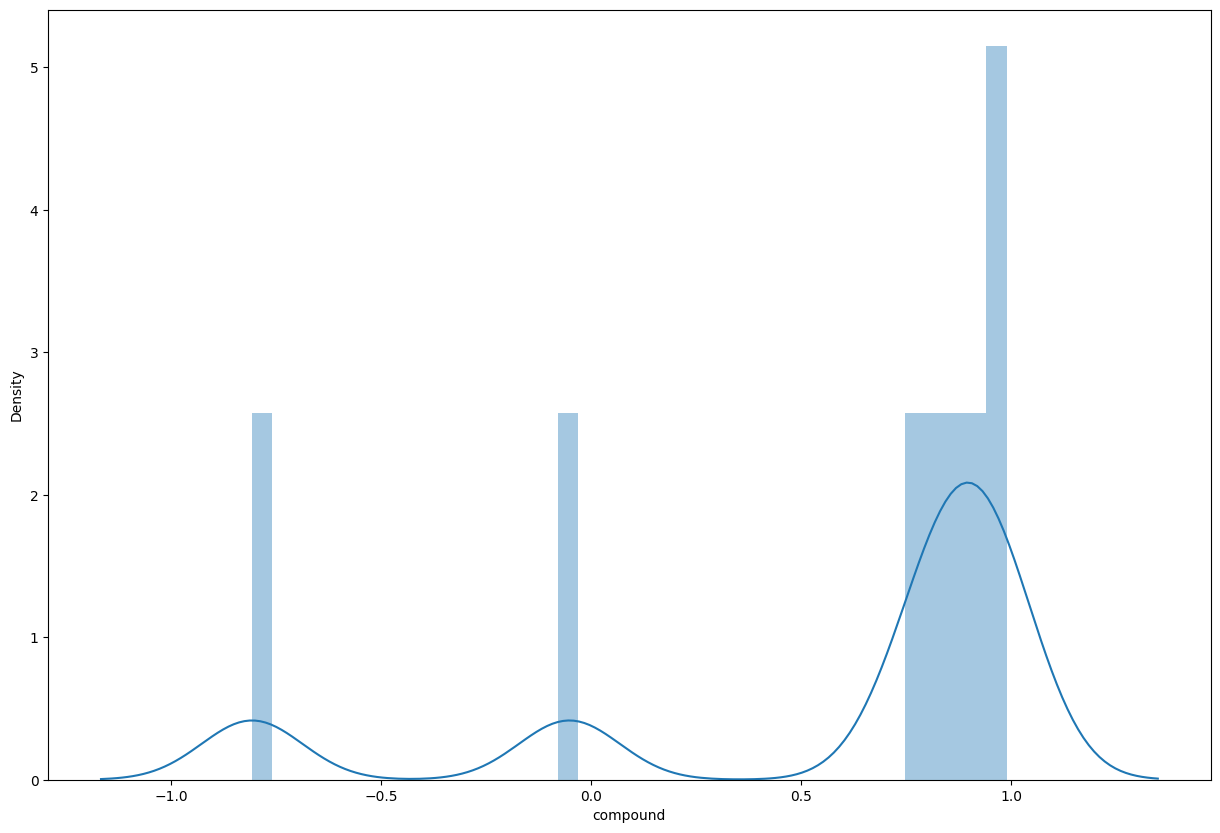

In [236]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [237]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

,Review,word_count
0,enjoying g access first time device entry leve...,161
1,like quite lot phone term hardware excellent p...,109
2,recently purchased new phone must say quite im...,77
3,doubt phone good look wise kuch plus point bhi...,79
4,though dont use camera must used amm redmi pho...,44


<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

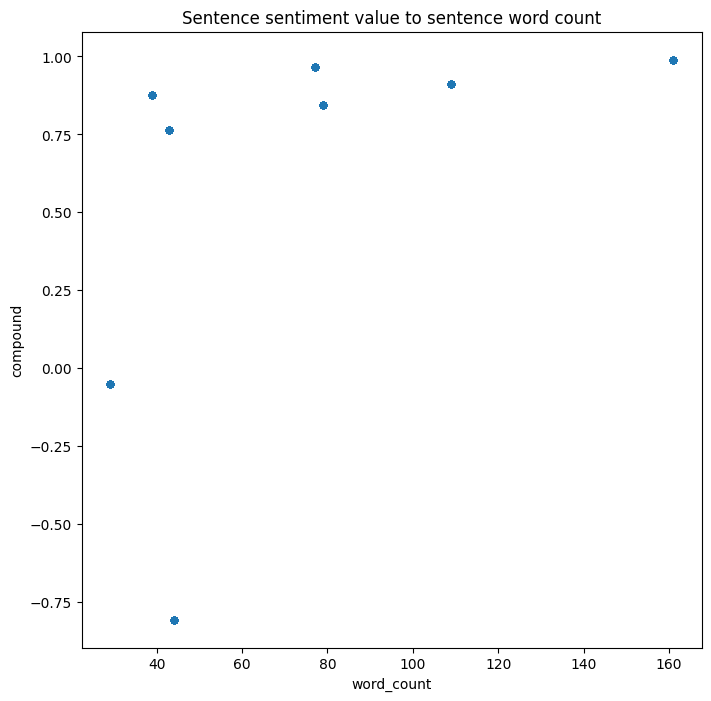

In [238]:
# Correlation analysis
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')

### ***b. Using TextBlob*** ###

In [239]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,2891
neg,413


In [240]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...,0.481333,0.162333
1,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...,0.550906,0.124094
2,recently purchased new phone must say quite im...,"I recently purchased a new phone, and I must s...",0.538223,0.308862
3,doubt phone good look wise kuch plus point bhi...,No doubt phone is good look wise..But kuch plu...,0.629167,0.305729
4,though dont use camera must used amm redmi pho...,Though I dont use Camera must..I have used amm...,0.474702,-0.176116


Text(0, 0.5, 'Subjectivity')

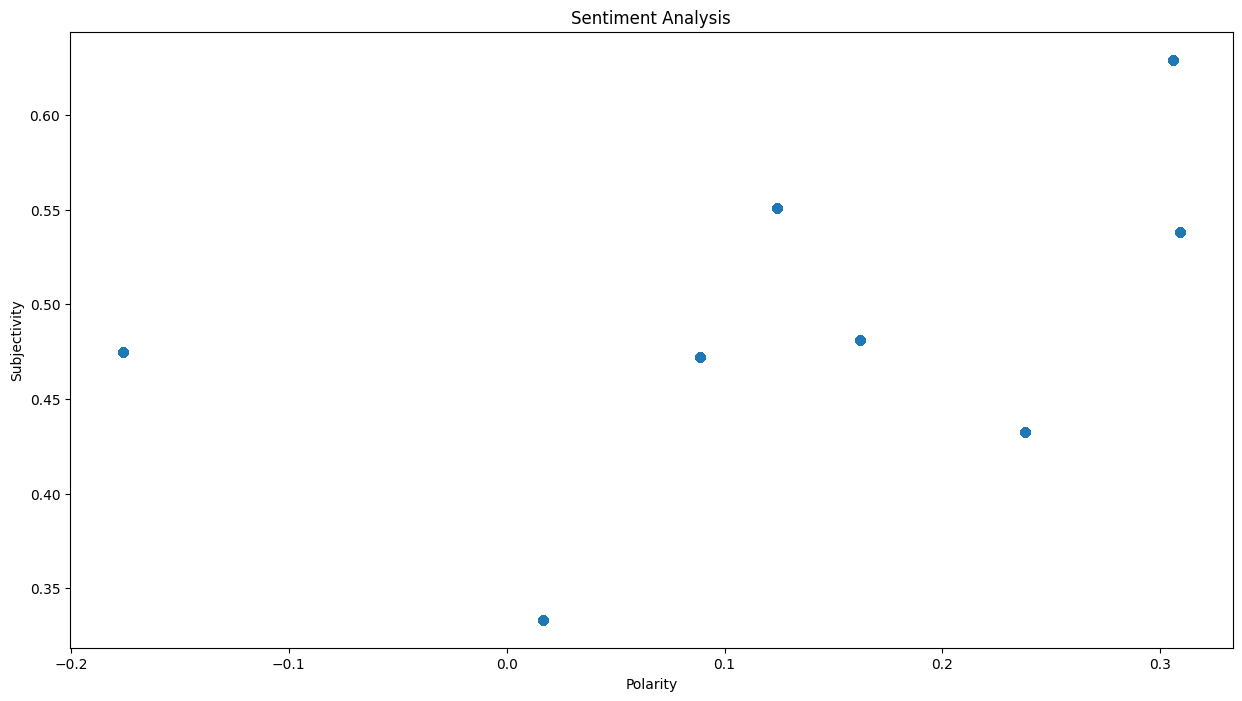

In [241]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [242]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [243]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...,0.481333,0.162333,pos
1,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...,0.550906,0.124094,pos
2,recently purchased new phone must say quite im...,"I recently purchased a new phone, and I must s...",0.538223,0.308862,pos
3,doubt phone good look wise kuch plus point bhi...,No doubt phone is good look wise..But kuch plu...,0.629167,0.305729,pos
4,though dont use camera must used amm redmi pho...,Though I dont use Camera must..I have used amm...,0.474702,-0.176116,neg


### **STORY GENERATION AND VISUALIZATION** ###

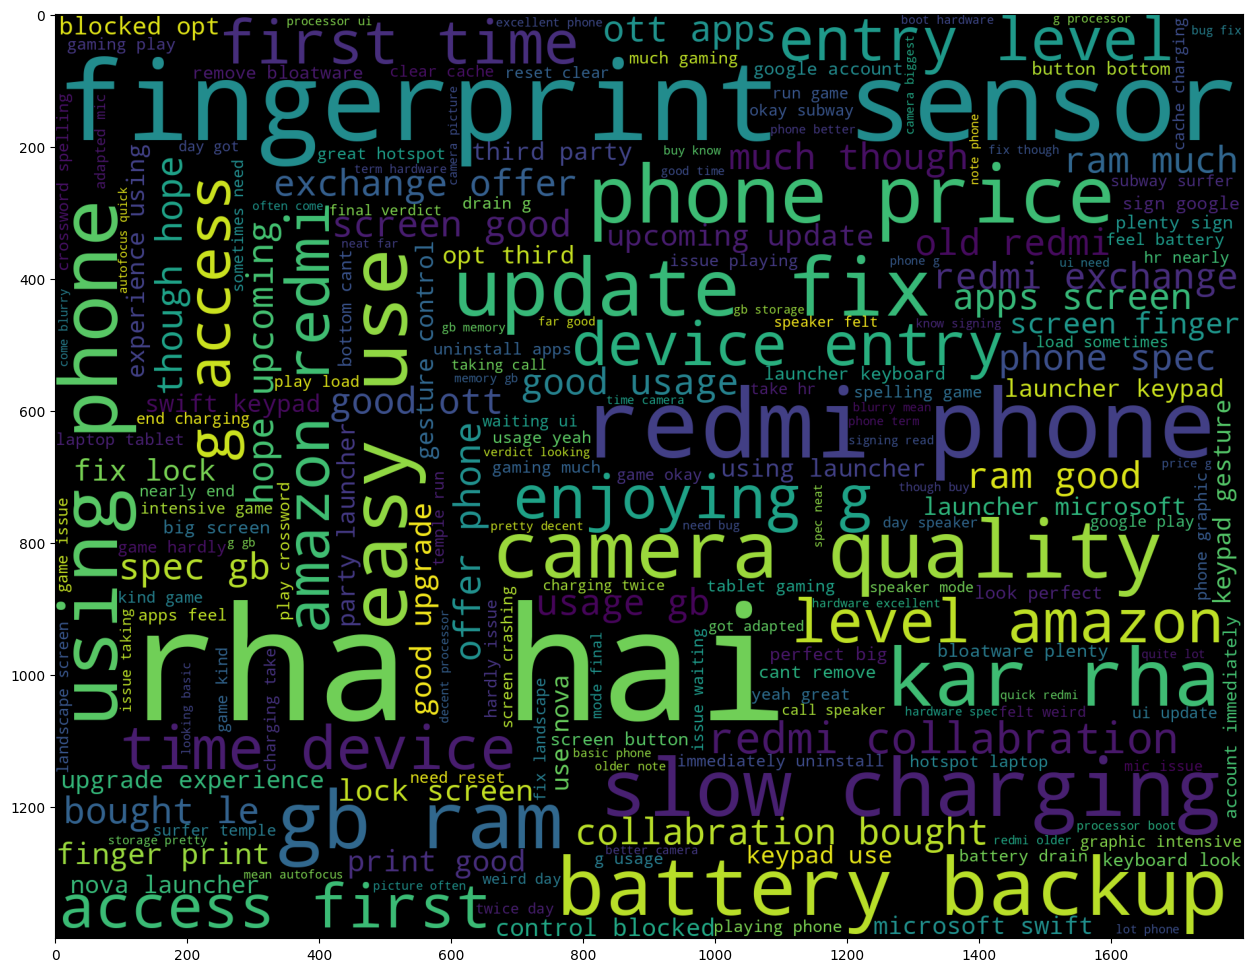

In [244]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

### ***A. Most common words in positive Review*** ###

In [245]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

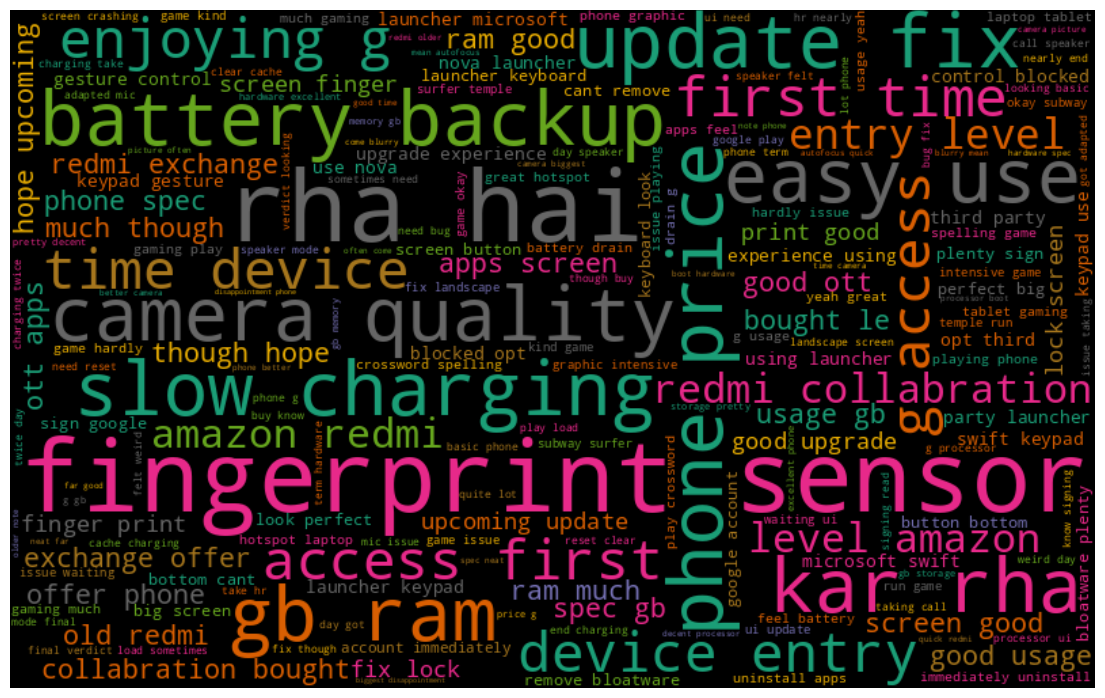

In [246]:
words_in_positive = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(words_in_positive)

### ***B. Most common words in negative Review*** ###

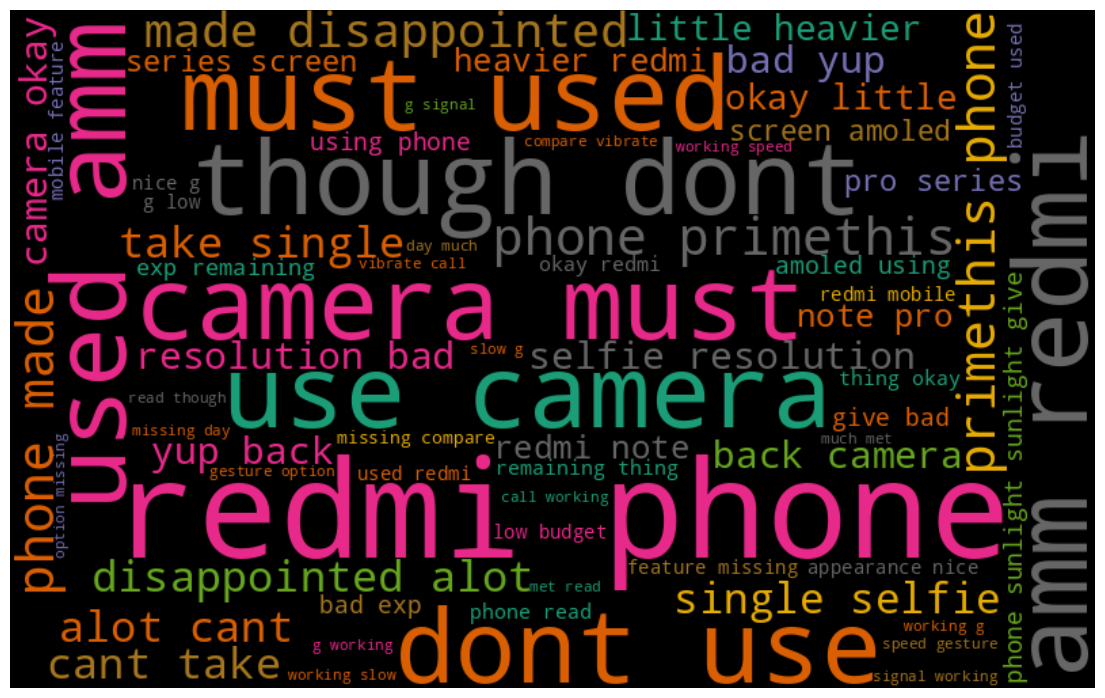

In [247]:
words_in_negative = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(words_in_negative)

### **Model Building: Sentiment Analysis** ###

In [248]:
target_variable = [(0 if x=='neg' else 1) for x in dataframe['sentiment']]

In [249]:
def plot_confusion_matrix(matrix):
    plt.figure(figsize = (10,7))
    classnames = ['Positive','Negative']
    sns.heatmap(matrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Reds",linewidths=3)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Confusion Matrix - Testing Data")

In [250]:
def naive_model(x_train, x_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(x_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(x_test.toarray())

    # calculating Accuracy Score
    print(f'Accuracy Score - {accuracy_score(y_test, predictions)}')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

#### **A. Predictions on 'key words' based features - Using Guassian Naive Bayes** ####

In [251]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')

# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

##### ***a. BOW word features*** #####

Accuracy Score - 1.0


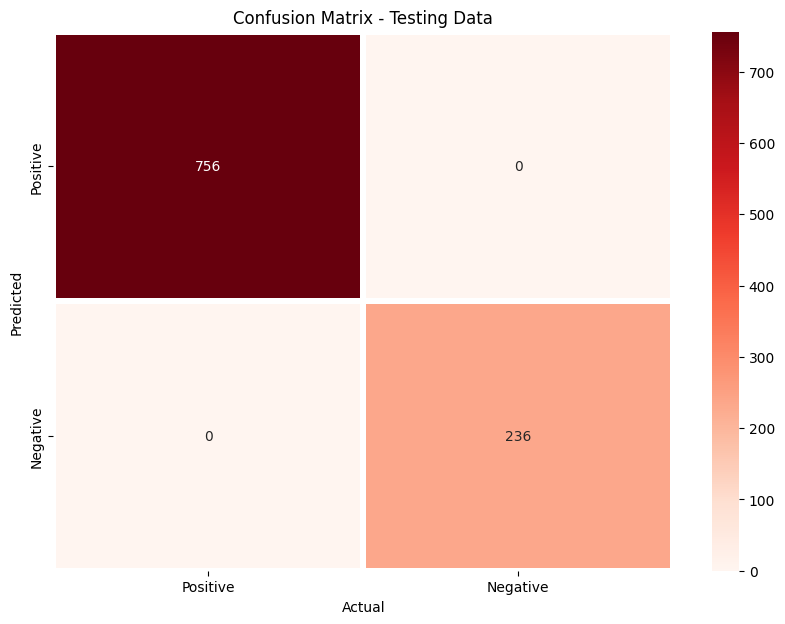

In [252]:
x_train, x_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(x_train, x_test, y_train, y_test)

##### ***b. TF-IDF word features*** #####

Accuracy Score - 1.0


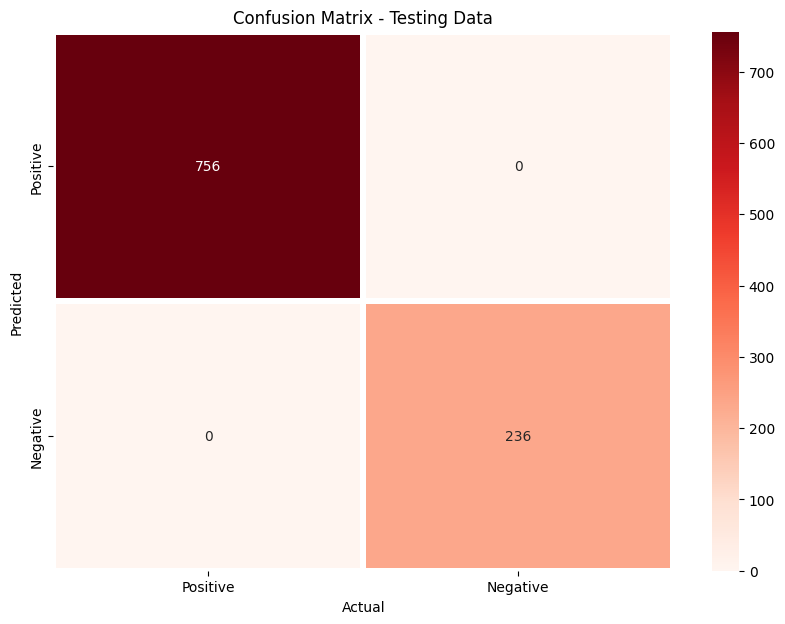

In [253]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(x_train, x_test, y_train, y_test)

Both methods are giving the same result

In [254]:
dataframe

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,enjoying g access first time device entry leve...,I am enjoying 5g access for first time.This de...,0.481333,0.162333,pos
1,like quite lot phone term hardware excellent p...,I like quite a lot about this phone. In terms ...,0.550906,0.124094,pos
2,recently purchased new phone must say quite im...,"I recently purchased a new phone, and I must s...",0.538223,0.308862,pos
3,doubt phone good look wise kuch plus point bhi...,No doubt phone is good look wise..But kuch plu...,0.629167,0.305729,pos
4,though dont use camera must used amm redmi pho...,Though I dont use Camera must..I have used amm...,0.474702,-0.176116,neg
...,...,...,...,...,...
3299,doubt phone good look wise kuch plus point bhi...,No doubt phone is good look wise..But kuch plu...,0.629167,0.305729,pos
3300,though dont use camera must used amm redmi pho...,Though I dont use Camera must..I have used amm...,0.474702,-0.176116,neg
3301,display brightness lower side fingerprint sens...,Display brightness is at lower side. Fingerpri...,0.432653,0.237755,pos
3302,like appearance nice g low budget used redmi m...,I like it's appearance very nice. 5g in low bu...,0.333333,0.016667,neg


In [255]:
dataframe['Sentiment_Binary'] = [(0 if x=='neg' else 1) for x in dataframe['sentiment']]

In [256]:
pipeline_ls = make_pipeline(CountVectorizer(max_df=0.90, min_df=2, tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [257]:
x_train, x_test, y_train, y_test = train_test_split(dataframe.Clean_Reviews, dataframe.Sentiment_Binary)

In [258]:
pipeline_ls.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.9, min_df=2, stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [259]:
pipeline_ls.score(x_test,y_test)

1.0

### **Using Randomforest with 200 Trees** ###

In [260]:
from sklearn.feature_extraction.text import TfidfVectorizer
converter = TfidfVectorizer(stop_words=stopwords.words('english'))
x = converter.fit_transform(dataframe.Clean_Reviews).toarray()
x

array([[0.        , 0.07360612, 0.07360612, ..., 0.        , 0.07360612,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.09174596, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [261]:
y = dataframe.Sentiment_Binary

In [262]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [263]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)

In [264]:
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [265]:
classifier.score(x_test, y_test)

1.0

In [266]:
y_train.value_counts()

1    1995
0     648
Name: Sentiment_Binary, dtype: int64

In [267]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (2643, 343)
Shape of x_test:  (661, 343)
Shape of y_train:  (2643,)
Shape of y_test:  (661,)


#### **BALANCING USING SMOTE** ####

In [268]:
# Using SMOTE to balance the data using Oversampling technique.

from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
counter_f = Counter(y_train)
print('Before',counter_f)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter_f = Counter(y_train_sm)
print('After',counter_f)

Before Counter({1: 1995, 0: 648})
After Counter({0: 1995, 1: 1995})


In [269]:
y_train_sm.value_counts()

0    1995
1    1995
Name: Sentiment_Binary, dtype: int64

In [270]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

# Function to give the confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided

def test_eval(clf_model, x_test, y_test, algo=None, sampling=None):

    # Getting the Prediction probability and prediction values for Test Set
    y_prob=clf_model.predict_proba(x_test)
    y_pred=clf_model.predict(x_test)
    print('_'*60)
    print('\nCONFUSION MATRIX')
    print(confusion_matrix(y_test,y_pred))
    print('_'*60)

    # Calculating the Accuracy
    diag_f = np.trace(confusion_matrix(y_test,y_pred))
    total_f = sum(sum(confusion_matrix(y_test,y_pred)))
    maccs_f = diag_f/total_f
    print(f"\nACCURACY: {maccs_f}\n")

    # Calculating the ROC_AUC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import metrics
    roc_auc_f = metrics.roc_auc_score(y_test, clf_model.predict_proba(x_test)[:, 1])
    print(f"ROC_AUC: {roc_auc_f}\n")
    print('_'*60)


    print(f"\nCLASSIFICATION REPORT")
    print('-'*60)
    print(classification_report(y_test,y_pred))
    print('-'*60)
    print('_'*60)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')


    return algo,precision,recall,f1,sampling

In [271]:
# Getting the necessary details i.e., confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided
from sklearn import metrics
model_params = {
    'random_forest' :{
        'model' :  RandomForestClassifier(),
        'params' : {
             "n_estimators": [5, 10, 15, 20, 25],
             'max_depth': [2, 3, 5, 10, 16, 20],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100, 200],
             'criterion': ['gini', 'entropy'],
             'max_features': [10]
        }

    }
}

sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm]
}

cv = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1)
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print("\n\n",' '*7, f"USING {model.upper()} WITH {resam.upper()}")
        print('_'*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))



         USING RANDOM_FOREST WITH ACTUAL
____________________________________________________________
____________________________________________________________

CONFUSION MATRIX
[[178   0]
 [  0 483]]
____________________________________________________________

ACCURACY: 1.0

ROC_AUC: 1.0

____________________________________________________________

CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       483

    accuracy                           1.00       661
   macro avg       1.00      1.00      1.00       661
weighted avg       1.00      1.00      1.00       661

------------------------------------------------------------
____________________________________________________________


         USING RANDOM_FOREST WITH SMOTE
____________________________________________________________
______

In [272]:
# Creating confusion matrix to know where our model failed
y_predicted = classifier.predict(x_test)

# Here, y_test is truth and y_predicted is predicted.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[178,   0],
       [  0, 483]])

**Balancing the data is not making much difference as the number of negative samples are very few and it is only replicating the same negative sentence as we can see in the clean_review.csv file.**

Text(0.5, 1.0, 'Confusion Matrix - Testing Data')

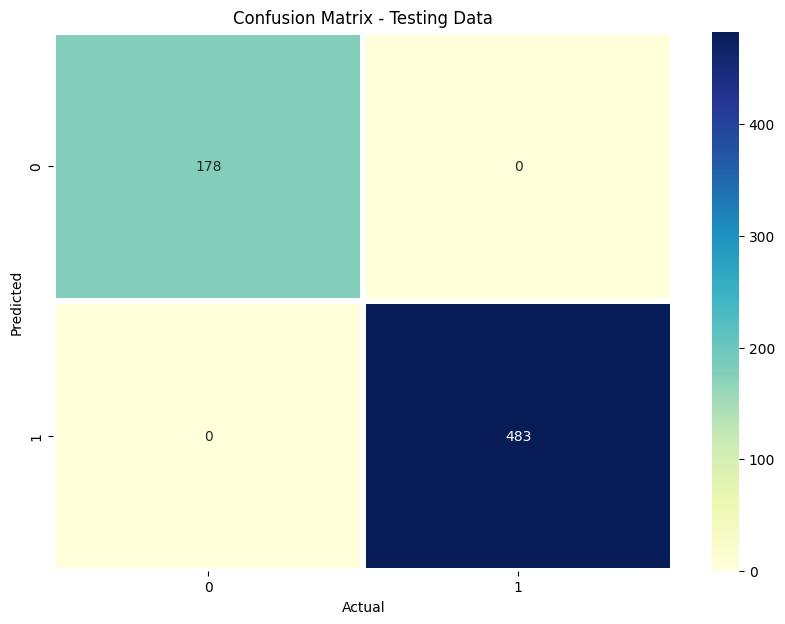

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
classnames = ['0','1']
sns.heatmap(cm,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="YlGnBu",linewidths=3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix - Testing Data")

In [274]:
review1 = "The mobile is economical and with good features"
review2 = "working slow g signal working speed gesture option missing day much met read"

In [275]:
x1 = converter.transform([review1, review2]).toarray()
classifier.predict(x1)

array([1, 0])

In [276]:
clf_best.predict(x1)

array([1, 0])

**The positive prediction '1' is matching exactly even if different sentences are used as reviews. However, w.r.t. the negative review training due to lack of sufficient training to this model with only 2 negative samples available, it is not giving correct results. Unless we give the exact negative review sentence or a part of it as seen above, we do not get a negative result '0'.**